<a href="https://colab.research.google.com/github/Tiya7461/tiya-/blob/main/employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd #To read CSV file
import matplotlib.pyplot as plt #To plot data
import seaborn as sns #Data Visualization
import math #for basic mat functions
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
#Read the data
data = pd.read_csv("/content/adult 3.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [132]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [133]:
#Datatypes
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [134]:
#Check for missing data
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [135]:
data = data.drop_duplicates(keep='first')
print('shapeof the data is:', data.shape,'\n','Number of duplicates are:', data.duplicated().sum())

shapeof the data is: (48790, 15) 
 Number of duplicates are: 0


In [136]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [137]:
data.shape

(48790, 15)

In [138]:
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [139]:
data.tail(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [140]:
data.occupation.value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
?,2805
Transport-moving,2355


In [141]:
data.gender.value_counts()

,count
gender,
Male,32614
Female,16176


In [142]:
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22366
Never-married,16082
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,627
Married-AF-spouse,37


In [143]:
data['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
?,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [144]:
data.occupation.replace({'?':'others'},inplace = True)

/tmp/ipython-input-144-1819146754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace = True)
/tmp/ipython-input-144-1819146754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.occupation.replace({'?':'others'},inplace = True)


In [145]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
others               2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64


In [146]:
data.workclass.replace({'?':'notlister'},inplace = True)

/tmp/ipython-input-146-3685356234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'notlister'},inplace = True)
/tmp/ipython-input-146-3685356234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.workclass.replace({'?':'notlister'},inplace = True)


In [147]:
print(data.workclass.value_counts())

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
notlister            2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [148]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,notlister,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [149]:
data=data[data['workclass']!='without-pay']
data=data[data['workclass']!='never-worked']

In [150]:
data['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
notlister,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [151]:
data['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
notlister,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [152]:
data.shape

(48790, 15)

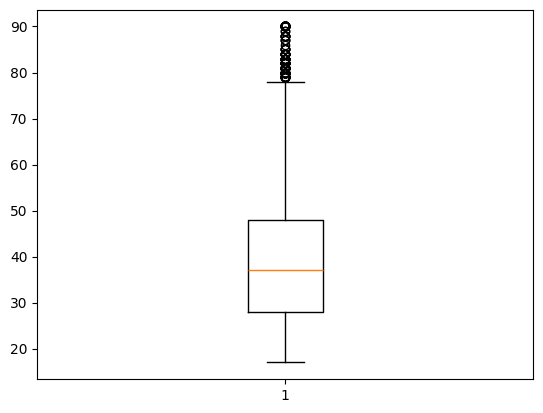

In [153]:
plt.boxplot(data['age'])
plt.show()

In [154]:
data = data[(data['age']<=75) & (data['age']>=17) ]

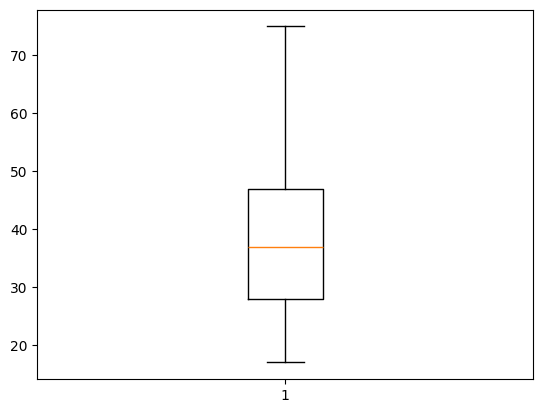

In [155]:
plt.boxplot(data['age'])
plt.show()

In [157]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data['education']=encoder.fit_transform(data['education'])
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,39,<=50K


In [159]:
x=data.drop(columns=['income'])
y=data['income']

In [161]:
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,39
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,39
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,39
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,39


In [160]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.375     , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.375     , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.125     , 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.375     , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.375     , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.5       , 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [163]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [164]:
xtrain

array([[0.34482759, 0.375     , 0.0155766 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.39655172, 0.375     , 0.09022573, ..., 0.        , 0.24489796,
        0.95121951],
       [0.31034483, 0.625     , 0.08303481, ..., 0.        , 0.75510204,
        0.95121951],
       ...,
       [0.0862069 , 0.375     , 0.20848581, ..., 0.        , 0.23469388,
        0.46341463],
       [0.53448276, 0.375     , 0.24869378, ..., 0.        , 0.39795918,
        0.12195122],
       [0.03448276, 0.375     , 0.18546189, ..., 0.        , 0.19387755,
        0.95121951]])

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8297191243287898

In [170]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predict1=lr.predict(xtest)
predict1

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.8266212308963239

In [173]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain)
predict2=clf.predict(xtest)
predict2

array(['>50K', '>50K', '<=50K', ..., '<=50K', '>50K', '>50K'], dtype='<U5')

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8466542750929368

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SVM" : SVC(),
    "GradientBoosting" : GradientBoostingClassifier()
 }

results = {}

for name, model in models.items():
  pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
  ])

  pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  results[name] = acc
  print(f"{name} Accuracy: {acc:.4f}")
  print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8223
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7386
        >50K       0.70      0.44      0.54      2298

    accuracy                           0.82      9684
   macro avg       0.77      0.69      0.72      9684
weighted avg       0.81      0.82      0.81      9684

RandomForest Accuracy: 0.8547
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7386
        >50K       0.73      0.62      0.67      2298

    accuracy                           0.85      9684
   macro avg       0.81      0.77      0.79      9684
weighted avg       0.85      0.85      0.85      9684

KNN Accuracy: 0.8274
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7386
        >50K       0.65      0.58      0.62      2298

    accuracy                           0.83      9684
   macro avg       0.76      0.74      0.

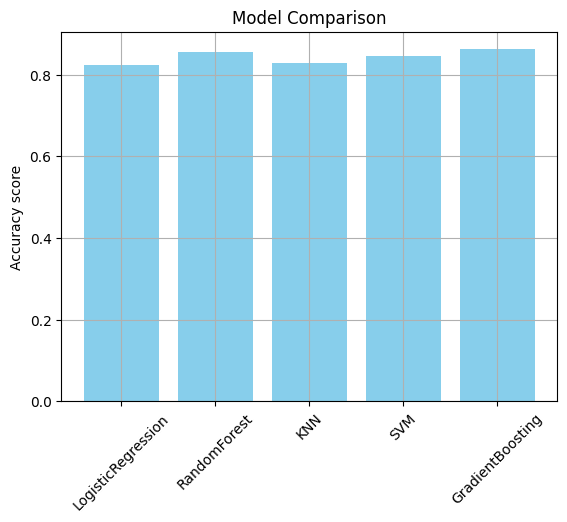

In [196]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()